In [37]:
import pandas as pd
import pyreadstat
import pprint

import warnings
warnings.filterwarnings('ignore')

# Formatting Datasets

Adding average overall scores to each data set. Overall scores for teachers are calculated by average of all the students for the teachers. Overall scores for schools are calcuated by average of all the teacher scores for the school.

Datasets for Iran

In [38]:
iran_teach, iran_teach_meta = pyreadstat.read_sav('ATGIRNR4.sav')
iran_school, iran_school_meta = pyreadstat.read_sav('ACGIRNR4.sav')
iran_score, iran_score_meta = pyreadstat.read_sav('ASTIRNR4.sav')

In [39]:
iran_score_good = iran_score[['IDSCHOOL','IDTEALIN','ASRREA01','ASRREA02','ASRREA03','ASRREA04','ASRREA05']]
REAcol = iran_score_good.loc[: , "ASRREA01":"ASRREA05"]
iran_score_good['OVR_SCORE'] = REAcol.mean(axis=1)
iran_score_final = iran_score_good[['IDSCHOOL','IDTEALIN','OVR_SCORE']]

In [40]:
iran_score_final = iran_score_final.groupby(['IDSCHOOL','IDTEALIN'], as_index=False).mean()
iran_score_final2 = iran_score_final.groupby(['IDSCHOOL'], as_index=False).mean()

In [41]:
iran_teach_good = iran_teach.merge(iran_score_final, how='left')
iran_school_good = iran_school.merge(iran_score_final2, how='left')

Datasets for Azerbaijan 

In [124]:
aze_teach, aze_teach_meta = pyreadstat.read_sav('ATGAZER4.sav')
aze_school, aze_school_meta = pyreadstat.read_sav('ACGAZER4.sav')
aze_score, aze_score_meta = pyreadstat.read_sav('ASTAZER4.sav')

aze_score_good = aze_score[['IDSCHOOL','IDTEALIN','ASRREA01','ASRREA02','ASRREA03','ASRREA04','ASRREA05']]
aze_col = aze_score_good.loc[: , "ASRREA01":"ASRREA05"]
aze_score_good['OVR_SCORE'] = REAcol.mean(axis=1)
aze_score_final = aze_score_good[['IDSCHOOL','IDTEALIN','OVR_SCORE']]
aze_score_final = aze_score_final.groupby(['IDSCHOOL','IDTEALIN'], as_index=False).mean()
aze_score_final2 = aze_score_final.groupby(['IDSCHOOL'], as_index=False).mean()
aze_teach_good = aze_teach.merge(aze_score_final, how='left')
aze_school_good = aze_school.merge(aze_score_final2, how='left')

aze_teach_good = aze_teach_good[pd.notnull(aze_teach_good['OVR_SCORE'])]
aze_school_good = aze_school_good[pd.notnull(aze_school_good['OVR_SCORE'])]

Datasets for Ireland

In [178]:
irl_teach, irl_teach_meta = pyreadstat.read_sav('ATGIRLR4.sav')
irl_school, irl_school_meta = pyreadstat.read_sav('ACGIRLR4.sav')
irl_score, irl_score_meta = pyreadstat.read_sav('ASTIRLR4.sav')

irl_score_good = irl_score[['IDSCHOOL','IDTEALIN','ASRREA01','ASRREA02','ASRREA03','ASRREA04','ASRREA05']]
irl_col = irl_score_good.loc[: , "ASRREA01":"ASRREA05"]
irl_score_good['OVR_SCORE'] = REAcol.mean(axis=1)
irl_score_final = irl_score_good[['IDSCHOOL','IDTEALIN','OVR_SCORE']]
irl_score_final = irl_score_final.groupby(['IDSCHOOL','IDTEALIN'], as_index=False).mean()
irl_score_final2 = irl_score_final.groupby(['IDSCHOOL'], as_index=False).mean()
irl_teach_good = irl_teach.merge(irl_score_final, how='left')
irl_school_good = irl_school.merge(irl_score_final2, how='left')

irl_teach_good = irl_teach_good[pd.notnull(irl_teach_good['OVR_SCORE'])]
irl_school_good = irl_school_good[pd.notnull(irl_school_good['OVR_SCORE'])]

Datasets for Norway

In [44]:
nor_teach, nor_teach_meta = pyreadstat.read_sav('ATGNORR4.sav')
nor_school, nor_school_meta = pyreadstat.read_sav('ACGNORR4.sav')
nor_score, nor_score_meta = pyreadstat.read_sav('ASTNORR4.sav')

nor_score_good = nor_score[['IDSCHOOL','IDTEALIN','ASRREA01','ASRREA02','ASRREA03','ASRREA04','ASRREA05']]
nor_col = nor_score_good.loc[: , "ASRREA01":"ASRREA05"]
nor_score_good['OVR_SCORE'] = REAcol.mean(axis=1)
nor_score_final = nor_score_good[['IDSCHOOL','IDTEALIN','OVR_SCORE']]
nor_score_final = nor_score_final.groupby(['IDSCHOOL','IDTEALIN'], as_index=False).mean()
nor_score_final2 = nor_score_final.groupby(['IDSCHOOL'], as_index=False).mean()
nor_teach_good = nor_teach.merge(nor_score_final, how='left')
nor_school_good = nor_school.merge(nor_score_final2, how='left')

All datasets merged

In [45]:
all_teach_good = pd.concat([iran_teach_good,aze_teach_good,irl_teach_good,nor_teach_good], ignore_index = True)
all_school_good = pd.concat([iran_school_good,aze_school_good,irl_school_good,nor_school_good], ignore_index = True)

In [220]:
all_teach_good['IDCNTRY'].replace({364:"IRAN",372:"IRELAND",31:"AZERBAIJAN",578:"NORWAY"}, inplace = True)
all_school_good['IDCNTRY'].replace({364:"IRAN",372:"IRELAND",31:"AZERBAIJAN",578:"NORWAY"}, inplace = True)

all_teach_good = all_teach_good[pd.notnull(all_teach_good['OVR_SCORE'])]
all_school_good = all_school_good[pd.notnull(all_school_good['OVR_SCORE'])]

all_teach_good['UN_INDEX'] = all_teach_good.IDCNTRY.apply(lambda x: 1 if (x == "NORWAY") or (x == "IRELAND") else 0)
all_school_good['UN_INDEX'] = all_school_good.IDCNTRY.apply(lambda x: 1 if (x == "NORWAY") or (x == "IRELAND") else 0)

# Graphing Functions

In [46]:
import seaborn as sns
import numpy as np
%matplotlib inline

def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
    medians = data.groupby([predictor])[outcome].median().values
    #medians[0], medians[1] = medians[1], medians[0]
    median_labels = [str(np.round(s, 2)) for s in medians]
    
    boxplot = sns.boxplot(x=predictor,y=outcome,data=data,width=0.5,palette="Set3", showfliers=False)
    
    pos = range(len(medians))
    for tick,label in zip(pos,boxplot.get_xticklabels()):
        boxplot.text(pos[tick], medians[tick] + 5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='black', weight='semibold')
    
    boxplot.set(
        xlabel=xlabel, 
        ylabel=ylabel)
    
    boxplot.figure.savefig(savename,
                    format='jpeg',
                    dpi=300)

In [47]:
def sctplt(data,predictor,outcome,xlabel,ylabel,savename):
    
    splot = sns.lmplot(predictor,outcome,data,fit_reg=False)
    
    splot.set(xlabel=xlabel, ylabel=ylabel)
    
    splot.savefig(savename,
                    format='jpeg',
                    dpi=300)

In [52]:
def epsilon2(h, n):
    return h/((n**2 - 1)/(n+1))

# Per country analysis (within country)

## Iran

### Iran Teacher Variables

Teaching experience correlation to overall score: 0.277


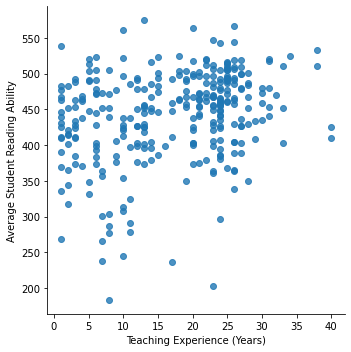

In [48]:
teach_exp_corr = iran_teach_good['ATBG01'].corr(iran_teach_good['OVR_SCORE'])
print('Teaching experience correlation to overall score: %.3f' % teach_exp_corr)
sctplt(iran_teach_good, 'ATBG01', 'OVR_SCORE', 'Teaching Experience (Years)', 'Average Student Reading Ability', 'IRANTeachExp.jpeg')

Class size correlation to overall score: 0.270


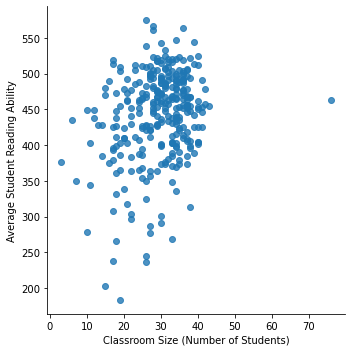

In [49]:
class_size_corr = iran_teach_good['ATBR01A'].corr(iran_teach_good['OVR_SCORE'])
print('Class size correlation to overall score: %.3f' % class_size_corr)
sctplt(iran_teach_good, 'ATBR01A', 'OVR_SCORE', 'Classroom Size (Number of Students)', 'Average Student Reading Ability', 'IRANClassSize.jpeg')

Levenes statistic: 5.923463163050999 p-value = 0.015510724432425769
Shapiro-Wilks statistic: 0.9466074705123901 p-value = 3.799017544992012e-09
KruskalResult(statistic=42.80400134146589, pvalue=6.050826616755948e-11)
Effect size: 0.1389740303294347


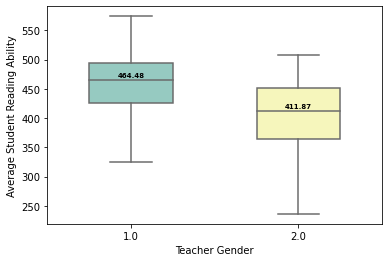

In [107]:
import statsmodels
import statsmodels.api as sm
import scipy.stats as stats
#import researchpy as rp
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt

gender = ols('OVR_SCORE ~ ATBG02', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATBG02'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(gender.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATBG02")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATBG02','OVR_SCORE','Teacher Gender','Average Student Reading Ability','IRANTeacherGender.jpeg')

Levenes statistic: 2.779869360807329 p-value = 0.01794238562178143
Shapiro-Wilks statistic: 0.9492809176445007 p-value = 7.729533457734306e-09
KruskalResult(statistic=30.723708929916256, pvalue=1.062039389359658e-05)
Effect size: 0.09975230172050732


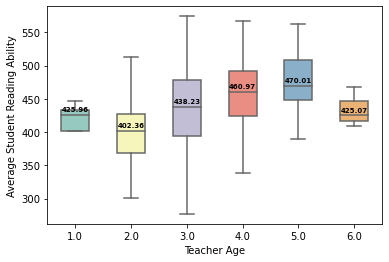

In [60]:
teach_age = ols('OVR_SCORE ~ ATBG03', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATBG03'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_age.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATBG03")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATBG03','OVR_SCORE','Teacher Age','Average Student Reading Ability','IRANTeacherAge.jpeg')

Levenes statistic: 1.1570022023883144 p-value = 0.33040595799113537
Shapiro-Wilks statistic: 0.9433596730232239 p-value = 1.649843373030535e-09
KruskalResult(statistic=2.5894250867704613, pvalue=0.7629713375576486)
Effect size: 0.008407224307696304


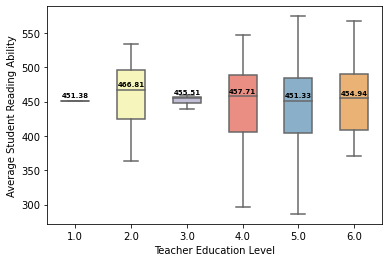

In [66]:
teach_edu = ols('OVR_SCORE ~ ATBG04', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATBG04'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATBG04")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATBG04','OVR_SCORE','Teacher Education Level','Average Student Reading Ability','IRANTeacherEducation.jpeg')

Levenes statistic: 0.7043756314066129 p-value = 0.5894651070151201
Shapiro-Wilks statistic: 0.93978351354599 p-value = 6.81161071991454e-10
KruskalResult(statistic=3.428207402523867, pvalue=0.48887818506883385)
Effect size: 0.01113054351468788


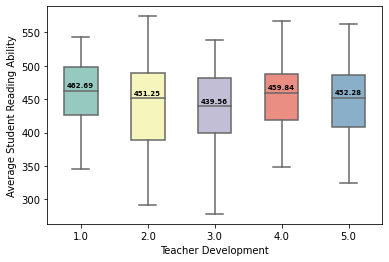

In [64]:
teach_dev = ols('OVR_SCORE ~ ATBG06', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATBG06'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_dev.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATBG06")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATBG06','OVR_SCORE','Teacher Development','Average Student Reading Ability','IRANTeacherDevelopment.jpeg')

Levenes statistic: 2.2987965507158306 p-value = 0.10211066428254903
Shapiro-Wilks statistic: 0.9413206577301025 p-value = 9.921655719224987e-10
KruskalResult(statistic=5.611554037501151, pvalue=0.06045977453784028)
Effect size: 0.018219331290588153


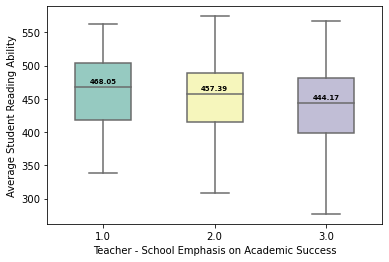

In [79]:
teach_emph_suc = ols('OVR_SCORE ~ ATDGEAS', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATDGEAS','OVR_SCORE','Teacher - School Emphasis on Academic Success','Average Student Reading Ability','IRANTeacherEmphSucc.jpeg')

Levenes statistic: 1.0617183694510393 p-value = 0.34713153298797755
Shapiro-Wilks statistic: 0.940656840801239 p-value = 8.427948894329518e-10
KruskalResult(statistic=0.09269676768587942, pvalue=0.9547092989523713)
Effect size: 0.00030096353144766047


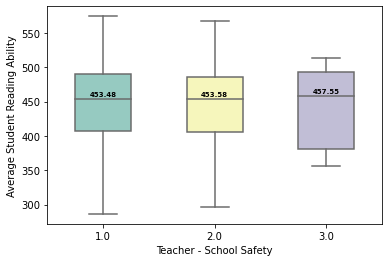

In [80]:
teach_safety = ols('OVR_SCORE ~ ATDGSOS', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATDGSOS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_safety.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATDGSOS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATDGSOS','OVR_SCORE','Teacher - School Safety','Average Student Reading Ability','IRANTeacherSafety.jpeg')

Levenes statistic: 0.03338499181099066 p-value = 0.9671696591083416
Shapiro-Wilks statistic: 0.9400774240493774 p-value = 7.316044436933566e-10
KruskalResult(statistic=0.44444191365585084, pvalue=0.8007384161659921)
Effect size: 0.00144299322615536


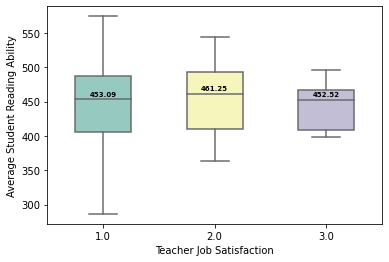

In [81]:
teach_satisf = ols('OVR_SCORE ~ ATDGTJS', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATDGTJS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_satisf.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATDGTJS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATDGTJS','OVR_SCORE','Teacher Job Satisfaction','Average Student Reading Ability','IRANTeacherSatisf.jpeg')

### Iran School Variables

Days school open correlation to overall score: 0.068


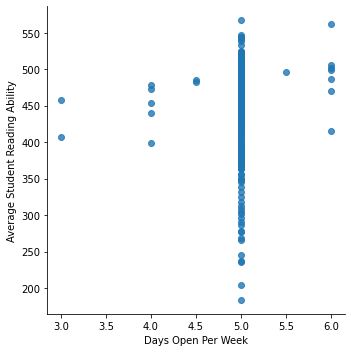

In [84]:
school_open_days = iran_school_good['ACDGDAYS'].corr(iran_school_good['OVR_SCORE'])
print('Days school open correlation to overall score: %.3f' % school_open_days)
sctplt(iran_school_good, 'ACDGDAYS', 'OVR_SCORE', 'Days Open Per Week', 'Average Student Reading Ability', 'IRANSchoolOpenDays.jpeg')

Instructional hour per year correlation to overall score: 0.118


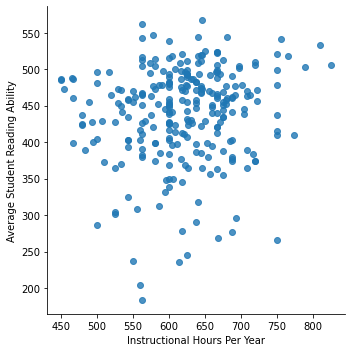

In [86]:
school_instr_hours = iran_school_good['ACDGTIHY'].corr(iran_school_good['OVR_SCORE'])
print('Instructional hour per year correlation to overall score: %.3f' % school_instr_hours)
sctplt(iran_school_good, 'ACDGTIHY', 'OVR_SCORE', 'Instructional Hours Per Year', 'Average Student Reading Ability', 'IRANSchoolInstrHours.jpeg')

Levenes statistic: 0.0018368827485444048 p-value = 0.9981648159019835
Shapiro-Wilks statistic: 0.9366841316223145 p-value = 2.33094588075744e-09
KruskalResult(statistic=0.5298979692306602, pvalue=0.7672450902808852)
Effect size: 0.0019625850712246674


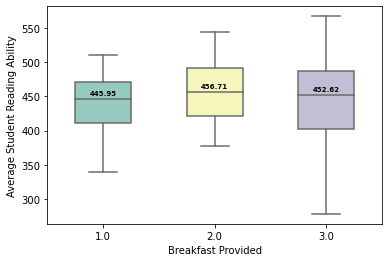

In [82]:
school_meals_b = ols('OVR_SCORE ~ ACBG06A', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACBG06A'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_b.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACBG06A")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACBG06A','OVR_SCORE','Breakfast Provided','Average Student Reading Ability','IRANSchoolBreakfast.jpeg')

Levenes statistic: 2.4188924100899767 p-value = 0.12114973442725437
Shapiro-Wilks statistic: 0.9368996620178223 p-value = 6.721707190848747e-09
KruskalResult(statistic=0.3794802867383851, pvalue=0.5378815093798535)
Effect size: 0.0014054825434755003


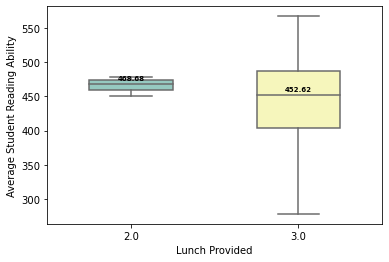

In [83]:
school_meals_l = ols('OVR_SCORE ~ ACBG06B', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACBG06B'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_l.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACBG06B")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACBG06B','OVR_SCORE','Lunch Provided','Average Student Reading Ability','IRANSchoolLunch.jpeg')

Levenes statistic: 7.5013927121032955 p-value = 7.762416152191257e-05
Shapiro-Wilks statistic: 0.9496217966079712 p-value = 5.54941621544458e-08
KruskalResult(statistic=64.46179856856918, pvalue=6.538477047654216e-14)
Effect size: 0.23874740210581177


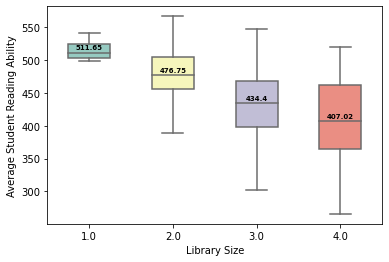

In [87]:
school_library_size = ols('OVR_SCORE ~ ACDG09', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDG09'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_library_size.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDG09")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDG09','OVR_SCORE','Library Size','Average Student Reading Ability','IRANSchoolLibrary.jpeg')

Levenes statistic: 0.2430751389016731 p-value = 0.8662186430912637
Shapiro-Wilks statistic: 0.9344690442085266 p-value = 2.449235481094547e-09
KruskalResult(statistic=14.283823151877527, pvalue=0.0025432050262970585)
Effect size: 0.052903048710657506


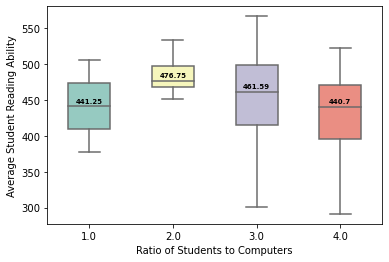

In [88]:
school_computer_resources = ols('OVR_SCORE ~ ACDG11R', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDG11R'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_computer_resources.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDG11R")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDG11R','OVR_SCORE','Ratio of Students to Computers','Average Student Reading Ability','IRANSchoolComputers.jpeg')

Levenes statistic: 1.8980256708049914 p-value = 0.1518732327560064
Shapiro-Wilks statistic: 0.9340657591819763 p-value = 1.2447487485189868e-09
KruskalResult(statistic=16.522530374967005, pvalue=0.00025833194603423824)
Effect size: 0.06119455694432224


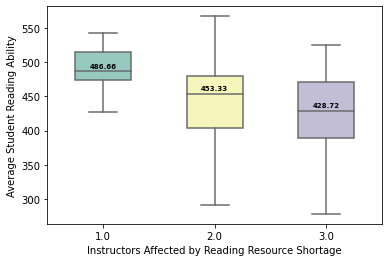

In [91]:
school_r_shortage = ols('OVR_SCORE ~ ACDGRRS', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDGRRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_r_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDGRRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDGRRS','OVR_SCORE','Instructors Affected by Reading Resource Shortage','Average Student Reading Ability','IRANReShortage.jpeg')

Levenes statistic: 0.1986791732824867 p-value = 0.8199335079715722
Shapiro-Wilks statistic: 0.9314883947372437 p-value = 7.165745774528887e-10
KruskalResult(statistic=11.751169249710642, pvalue=0.0028071525835359624)
Effect size: 0.04352284907300238


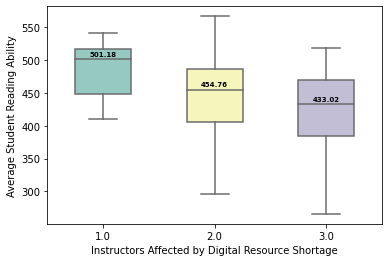

In [92]:
school_comp_shortage = ols('OVR_SCORE ~ ACDGDRS', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDGDRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_comp_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDGDRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDGDRS','OVR_SCORE','Instructors Affected by Digital Resource Shortage','Average Student Reading Ability','IRANDigShortage.jpeg')

Levenes statistic: 1.2287238722247247 p-value = 0.2943091207084216
Shapiro-Wilks statistic: 0.9376816153526306 p-value = 2.7647255596008335e-09
KruskalResult(statistic=18.7098534384196, pvalue=8.653801859918556e-05)
Effect size: 0.06929575347562815


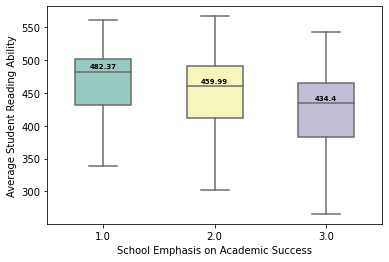

In [93]:
school_emph_suc = ols('OVR_SCORE ~ ACDGEAS', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDGEAS','OVR_SCORE','School Emphasis on Academic Success','Average Student Reading Ability','IRANSchoolEmph.jpeg')

Levenes statistic: 0.32542240983251897 p-value = 0.7225082611439801
Shapiro-Wilks statistic: 0.9371312260627747 p-value = 2.574817470346602e-09
KruskalResult(statistic=22.64815634692502, pvalue=1.2078564884554042e-05)
Effect size: 0.08388206054416675


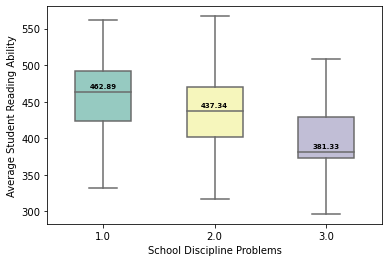

In [94]:
school_discipline = ols('OVR_SCORE ~ ACDGDAS', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDGDAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_discipline.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDGDAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDGDAS','OVR_SCORE','School Discipline Problems','Average Student Reading Ability','IRANSchoolDisc.jpeg')

Principal experience correlation to overall score: -0.025


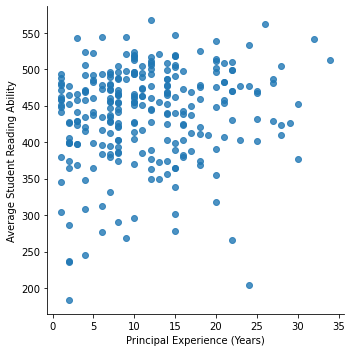

In [147]:
school_experience = iran_school_good['ACBG18'].corr(iran_school_good['OVR_SCORE'])
print('Principal experience correlation to overall score: %.3f' % school_instr_hours)
sctplt(iran_school_good, 'ACBG18', 'OVR_SCORE', 'Principal Experience (Years)', 'Average Student Reading Ability', 'IRANSchoolExp.jpeg')

Levenes statistic: 1.1254971823650035 p-value = 0.32601990955094917
Shapiro-Wilks statistic: 0.9376101493835449 p-value = 2.720699443514718e-09
KruskalResult(statistic=0.823532614283863, pvalue=0.6624790745921131)
Effect size: 0.0030501207936439374


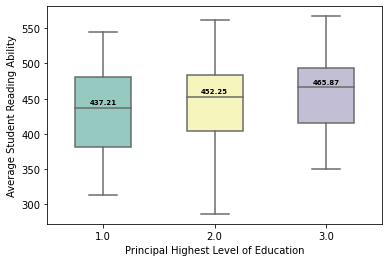

In [96]:
school_princip_edu = ols('OVR_SCORE ~ ACBG20', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACBG20'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_princip_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACBG20")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACBG20','OVR_SCORE','Principal Highest Level of Education','Average Student Reading Ability','IRANSchoolEdu.jpeg')

## Azerbaijan

### Azerbaijan Teacher Variables

Teaching experience correlation to overall score: 0.048


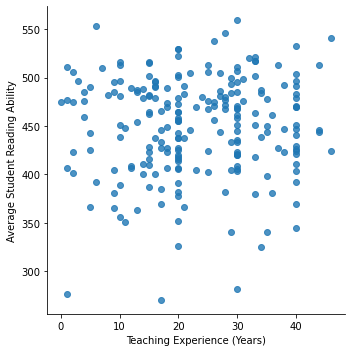

In [125]:
teach_exp_corr = aze_teach_good['ATBG01'].corr(aze_teach_good['OVR_SCORE'])
print('Teaching experience correlation to overall score: %.3f' % teach_exp_corr)
sctplt(aze_teach_good, 'ATBG01', 'OVR_SCORE', 'Teaching Experience (Years)', 'Average Student Reading Ability', 'AZETeachExp.jpeg')

Class size correlation to overall score: -0.126


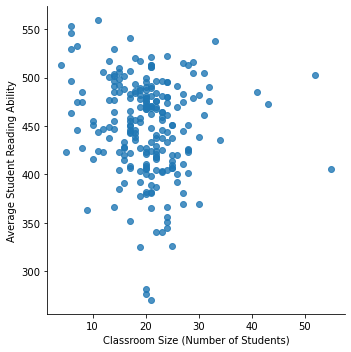

In [126]:
class_size_corr = aze_teach_good['ATBR01A'].corr(aze_teach_good['OVR_SCORE'])
print('Class size correlation to overall score: %.3f' % class_size_corr)
sctplt(aze_teach_good, 'ATBR01A', 'OVR_SCORE', 'Classroom Size (Number of Students)', 'Average Student Reading Ability', 'AZEClassSize.jpeg')

Levenes statistic: 0.488028223512951 p-value = 0.4855328320846616
Shapiro-Wilks statistic: 0.9656535387039185 p-value = 2.7931768272537738e-05
KruskalResult(statistic=0.6800043308497834, pvalue=0.40958523281239345)
Effect size: 0.0030088687205742626


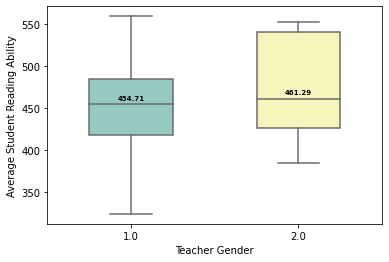

In [127]:
gender = ols('OVR_SCORE ~ ATBG02', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATBG02'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(gender.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATBG02")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATBG02','OVR_SCORE','Teacher Gender','Average Student Reading Ability','AZETeacherGender.jpeg')

Levenes statistic: 0.6731153288319567 p-value = 0.6442431218575471
Shapiro-Wilks statistic: 0.9708867073059082 p-value = 0.00012773709022440016
KruskalResult(statistic=5.285082723218579, pvalue=0.38208786119223836)
Effect size: 0.023385321784153007


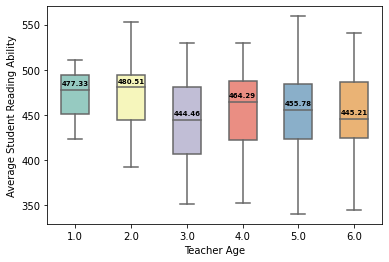

In [129]:
teach_age = ols('OVR_SCORE ~ ATBG03', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATBG03'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_age.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATBG03")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATBG03','OVR_SCORE','Teacher Age','Average Student Reading Ability','AZETeacherAge.jpeg')

Levenes statistic: 0.8653456773759992 p-value = 0.5052479544093221
Shapiro-Wilks statistic: 0.972110390663147 p-value = 0.00027189109823666513
KruskalResult(statistic=7.554919341184245, pvalue=0.1825310008909407)
Effect size: 0.033428846642408167


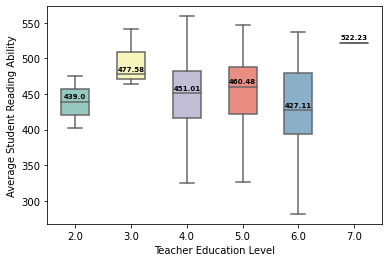

In [130]:
teach_edu = ols('OVR_SCORE ~ ATBG04', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATBG04'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATBG04")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATBG04','OVR_SCORE','Teacher Education Level','Average Student Reading Ability','AZETeacherEducation.jpeg')

Levenes statistic: 1.4654640024710668 p-value = 0.21383955693501372
Shapiro-Wilks statistic: 0.9734753370285034 p-value = 0.000415470392908901
KruskalResult(statistic=5.5457370463713005, pvalue=0.23573831366729298)
Effect size: 0.024538659497218143


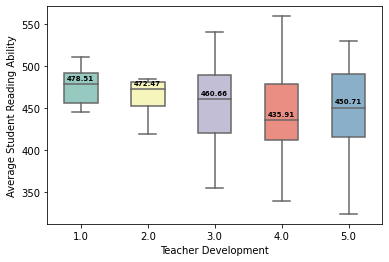

In [131]:
teach_dev = ols('OVR_SCORE ~ ATBG06', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATBG06'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_dev.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATBG06")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATBG06','OVR_SCORE','Teacher Development','Average Student Reading Ability','AZETeacherDevelopment.jpeg')

Levenes statistic: 0.9070498553280609 p-value = 0.40521780651295536
Shapiro-Wilks statistic: 0.9682491421699524 p-value = 6.72432070132345e-05
KruskalResult(statistic=8.827860276717956, pvalue=0.0121075005488077)
Effect size: 0.039061328658044056


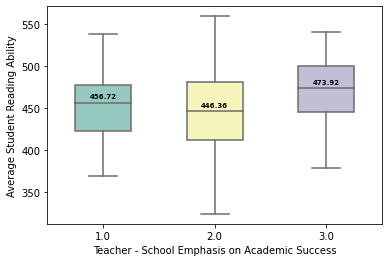

In [132]:
teach_emph_suc = ols('OVR_SCORE ~ ATDGEAS', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATDGEAS','OVR_SCORE','Teacher - School Emphasis on Academic Success','Average Student Reading Ability','AZETeacherEmphSucc.jpeg')

Levenes statistic: 4.088595551833699 p-value = 0.018047099053861575
Shapiro-Wilks statistic: 0.9746871590614319 p-value = 0.00047718806308694184
KruskalResult(statistic=13.0691356542618, pvalue=0.0014523565612438356)
Effect size: 0.05782803386841504


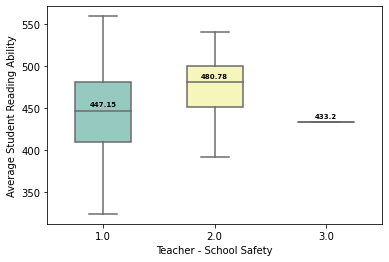

In [133]:
teach_safety = ols('OVR_SCORE ~ ATDGSOS', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATDGSOS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_safety.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATDGSOS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATDGSOS','OVR_SCORE','Teacher - School Safety','Average Student Reading Ability','AZETeacherSafety.jpeg')

Levenes statistic: 0.8078769517632776 p-value = 0.4471156327812841
Shapiro-Wilks statistic: 0.9677330851554871 p-value = 5.547302134800702e-05
KruskalResult(statistic=5.614283574103752, pvalue=0.06037731723440293)
Effect size: 0.024841962717273236


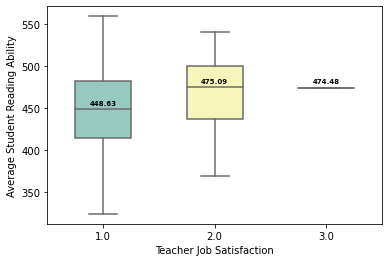

In [134]:
teach_satisf = ols('OVR_SCORE ~ ATDGTJS', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATDGTJS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_satisf.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATDGTJS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATDGTJS','OVR_SCORE','Teacher Job Satisfaction','Average Student Reading Ability','AZETeacherSatisf.jpeg')

### Azerbaijan School Variables

Days school open correlation to overall score: 0.155


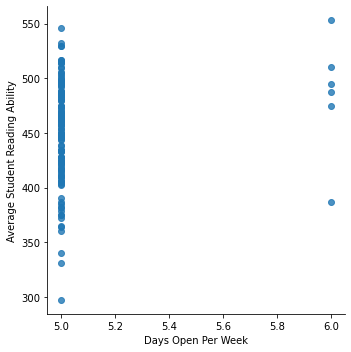

In [135]:
school_open_days = aze_school_good['ACDGDAYS'].corr(aze_school_good['OVR_SCORE'])
print('Days school open correlation to overall score: %.3f' % school_open_days)
sctplt(aze_school_good, 'ACDGDAYS', 'OVR_SCORE', 'Days Open Per Week', 'Average Student Reading Ability', 'AZESchoolOpenDays.jpeg')

Instructional hour per year correlation to overall score: -0.025


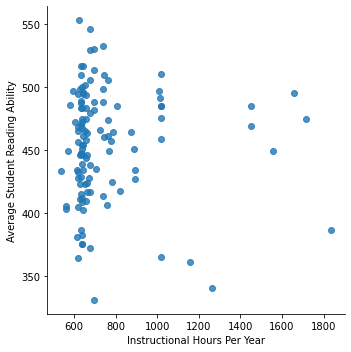

In [136]:
school_instr_hours = aze_school_good['ACDGTIHY'].corr(aze_school_good['OVR_SCORE'])
print('Instructional hour per year correlation to overall score: %.3f' % school_instr_hours)
sctplt(aze_school_good, 'ACDGTIHY', 'OVR_SCORE', 'Instructional Hours Per Year', 'Average Student Reading Ability', 'AZESchoolInstrHours.jpeg')

Levenes statistic: 1.5376107943847022 p-value = 0.21893039803475092
Shapiro-Wilks statistic: 0.9703732132911682 p-value = 0.006603569258004427
KruskalResult(statistic=2.8817751312828364, pvalue=0.23671756303903158)
Effect size: 0.02150578456181221


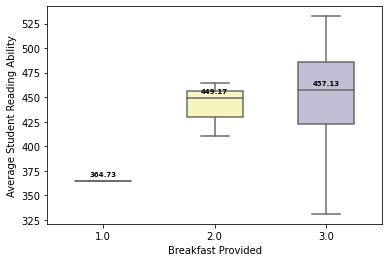

In [137]:
school_meals_b = ols('OVR_SCORE ~ ACBG06A', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACBG06A'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_b.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACBG06A")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACBG06A','OVR_SCORE','Breakfast Provided','Average Student Reading Ability','AZESchoolBreakfast.jpeg')

Levenes statistic: 1.0326396593964369 p-value = 0.35943059737374927
Shapiro-Wilks statistic: 0.9777330160140991 p-value = 0.05227924510836601
KruskalResult(statistic=2.932156243306906, pvalue=0.23082899553915662)
Effect size: 0.02188176300975303


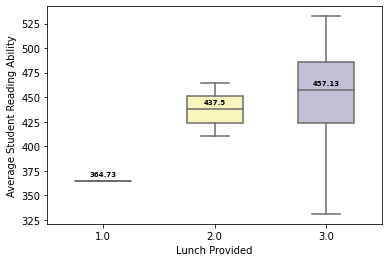

In [138]:
school_meals_l = ols('OVR_SCORE ~ ACBG06B', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACBG06B'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_l.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACBG06B")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACBG06B','OVR_SCORE','Lunch Provided','Average Student Reading Ability','AZESchoolLunch.jpeg')

Levenes statistic: 1.5446981381891918 p-value = 0.21738944363030172
Shapiro-Wilks statistic: 0.9842934608459473 p-value = 0.14304351806640625
KruskalResult(statistic=3.620299933057197, pvalue=0.16362959600011248)
Effect size: 0.02701716367953132


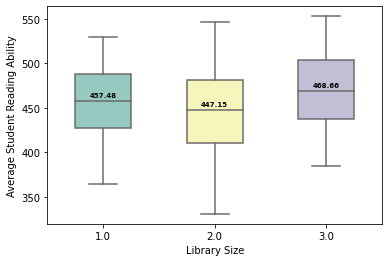

In [139]:
school_library_size = ols('OVR_SCORE ~ ACDG09', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDG09'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_library_size.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDG09")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDG09','OVR_SCORE','Library Size','Average Student Reading Ability','AZESchoolLibrary.jpeg')

Levenes statistic: 1.0585218228283795 p-value = 0.36957768193567136
Shapiro-Wilks statistic: 0.9815778136253357 p-value = 0.09697772562503815
KruskalResult(statistic=16.120559146297694, pvalue=0.0010712364628517807)
Effect size: 0.12030268019625145


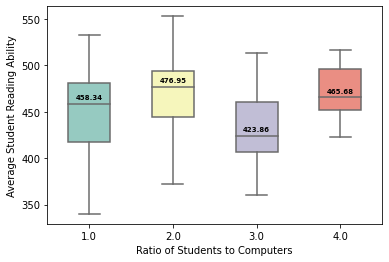

In [140]:
school_computer_resources = ols('OVR_SCORE ~ ACDG11R', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDG11R'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_computer_resources.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDG11R")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDG11R','OVR_SCORE','Ratio of Students to Computers','Average Student Reading Ability','AZESchoolComputers.jpeg')

Levenes statistic: 1.2677161251720426 p-value = 0.2849834988400745
Shapiro-Wilks statistic: 0.9820331931114197 p-value = 0.080805703997612
KruskalResult(statistic=1.1881376171452303, pvalue=0.5520764154098459)
Effect size: 0.008866698635412167


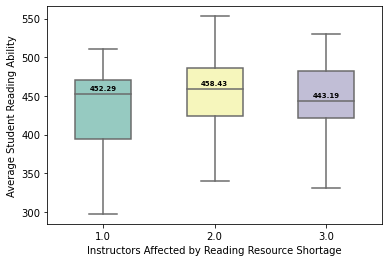

In [141]:
school_r_shortage = ols('OVR_SCORE ~ ACDGRRS', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDGRRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_r_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDGRRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDGRRS','OVR_SCORE','Instructors Affected by Reading Resource Shortage','Average Student Reading Ability','AZEReShortage.jpeg')

Levenes statistic: 0.47732179694760135 p-value = 0.6215513481978736
Shapiro-Wilks statistic: 0.9818068146705627 p-value = 0.07888234406709671
KruskalResult(statistic=0.32482784391186215, pvalue=0.8500892610970294)
Effect size: 0.0024240883874019565


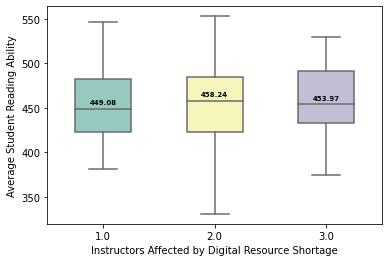

In [142]:
school_comp_shortage = ols('OVR_SCORE ~ ACDGDRS', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDGDRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_comp_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDGDRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDGDRS','OVR_SCORE','Instructors Affected by Digital Resource Shortage','Average Student Reading Ability','AZEDigShortage.jpeg')

Levenes statistic: 0.8493215807966152 p-value = 0.4301009100770177
Shapiro-Wilks statistic: 0.9830623865127563 p-value = 0.10259608924388885
KruskalResult(statistic=0.2671092099824932, pvalue=0.8749796894148458)
Effect size: 0.0019933523133021883


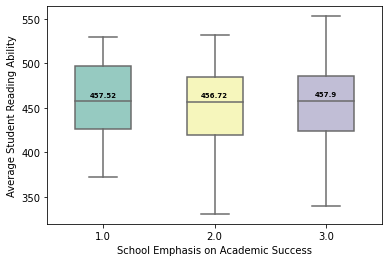

In [143]:
school_emph_suc = ols('OVR_SCORE ~ ACDGEAS', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDGEAS','OVR_SCORE','School Emphasis on Academic Success','Average Student Reading Ability','AZESchoolEmph.jpeg')

Levenes statistic: 0.6275250549646861 p-value = 0.5355459678101009
Shapiro-Wilks statistic: 0.979861319065094 p-value = 0.04880586639046669
KruskalResult(statistic=5.152304363799658, pvalue=0.07606613027095172)
Effect size: 0.03845003256566909


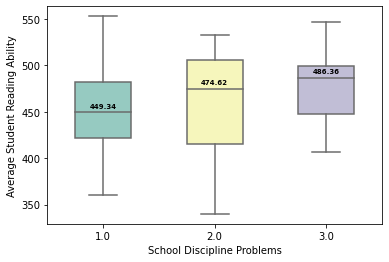

In [144]:
school_discipline = ols('OVR_SCORE ~ ACDGDAS', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDGDAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_discipline.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDGDAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDGDAS','OVR_SCORE','School Discipline Problems','Average Student Reading Ability','AZESchoolDisc.jpeg')


Principal experience correlation to overall score: -0.025


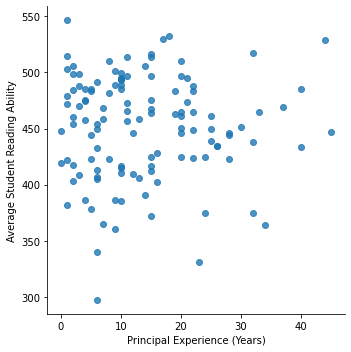

In [149]:
school_experience = aze_school_good['ACBG18'].corr(aze_school_good['OVR_SCORE'])
print('Principal experience correlation to overall score: %.3f' % school_instr_hours)
sctplt(aze_school_good, 'ACBG18', 'OVR_SCORE', 'Principal Experience (Years)', 'Average Student Reading Ability', 'AZESchoolExp.jpeg')

Levenes statistic: 0.9378664085133154 p-value = 0.39411472196412445
Shapiro-Wilks statistic: 0.9855267405509949 p-value = 0.17672885954380035
KruskalResult(statistic=8.568291193025232, pvalue=0.013785394780396825)
Effect size: 0.06394247158974053


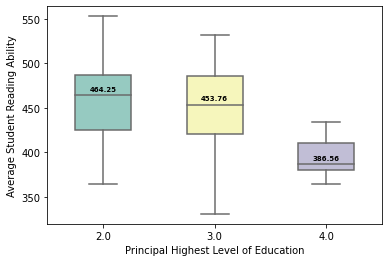

In [150]:
school_princip_edu = ols('OVR_SCORE ~ ACBG20', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACBG20'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_princip_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACBG20")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACBG20','OVR_SCORE','Principal Highest Level of Education','Average Student Reading Ability','AZESchoolEdu.jpeg')

## Norway

### Norway Teacher Variables

Teaching experience correlation to overall score: 0.055


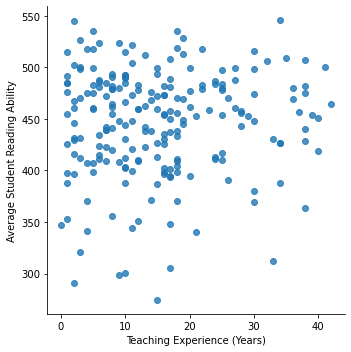

In [152]:
teach_exp_corr = nor_teach_good['ATBG01'].corr(nor_teach_good['OVR_SCORE'])
print('Teaching experience correlation to overall score: %.3f' % teach_exp_corr)
sctplt(nor_teach_good, 'ATBG01', 'OVR_SCORE', 'Teaching Experience (Years)', 'Average Student Reading Ability', 'NORTeachExp.jpeg')

Class size correlation to overall score: -0.062


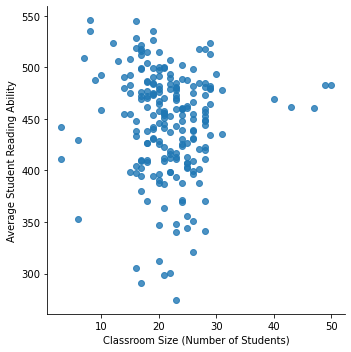

In [153]:
class_size_corr = nor_teach_good['ATBR01A'].corr(nor_teach_good['OVR_SCORE'])
print('Class size correlation to overall score: %.3f' % class_size_corr)
sctplt(nor_teach_good, 'ATBR01A', 'OVR_SCORE', 'Classroom Size (Number of Students)', 'Average Student Reading Ability', 'NORClassSize.jpeg')

Levenes statistic: 0.26745816422133367 p-value = 0.6055811201316212
Shapiro-Wilks statistic: 0.9602217674255371 p-value = 1.0810623280121945e-05
KruskalResult(statistic=0.9476033591731721, pvalue=0.3303300927681434)
Effect size: 0.004428053080248468


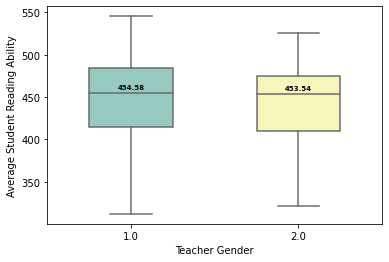

In [154]:
gender = ols('OVR_SCORE ~ ATBG02', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATBG02'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(gender.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATBG02")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

bxplt(nor_teach_good,'ATBG02','OVR_SCORE','Teacher Gender','Average Student Reading Ability','NORTeacherGender.jpeg')

Levenes statistic: 2.9292222187303834 p-value = 0.014070155049922586
Shapiro-Wilks statistic: 0.964821457862854 p-value = 3.689004006446339e-05
KruskalResult(statistic=7.819966564967103, pvalue=0.16644071460972726)
Effect size: 0.036541899836294876


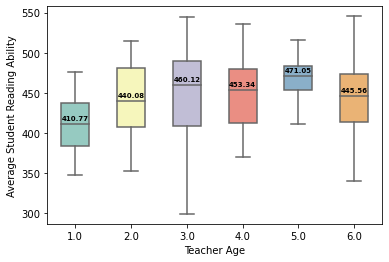

In [155]:
teach_age = ols('OVR_SCORE ~ ATBG03', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATBG03'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_age.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATBG03")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATBG03','OVR_SCORE','Teacher Age','Average Student Reading Ability','NORTeacherAge.jpeg')

Levenes statistic: 0.9151443588142693 p-value = 0.45600108837254216
Shapiro-Wilks statistic: 0.9621774554252625 p-value = 1.8054332031169906e-05
KruskalResult(statistic=5.294250831758973, pvalue=0.2584156055596575)
Effect size: 0.024739489868032583


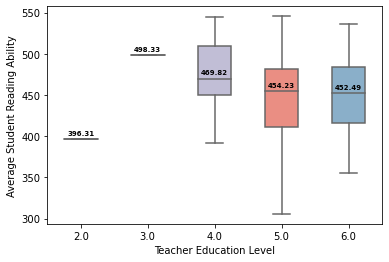

In [156]:
teach_edu = ols('OVR_SCORE ~ ATBG04', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATBG04'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATBG04")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATBG04','OVR_SCORE','Teacher Education Level','Average Student Reading Ability','NORTeacherEducation.jpeg')

Levenes statistic: 1.0084250105094257 p-value = 0.40407284325723264
Shapiro-Wilks statistic: 0.9630326628684998 p-value = 2.268677781103179e-05
KruskalResult(statistic=2.985571077564373, pvalue=0.5602429425762174)
Effect size: 0.013951266717590527


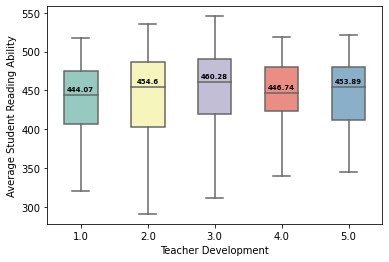

In [157]:
teach_dev = ols('OVR_SCORE ~ ATBG06', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATBG06'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_dev.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATBG06")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATBG06','OVR_SCORE','Teacher Development','Average Student Reading Ability','NORTeacherDevelopment.jpeg')

Levenes statistic: 1.0707393732084403 p-value = 0.3446098773657362
Shapiro-Wilks statistic: 0.9611925482749939 p-value = 1.3922241123509593e-05
KruskalResult(statistic=0.37133012877211513, pvalue=0.8305517297542284)
Effect size: 0.0017351875176267063


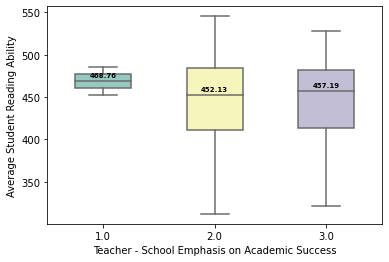

In [158]:
teach_emph_suc = ols('OVR_SCORE ~ ATDGEAS', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATDGEAS','OVR_SCORE','Teacher - School Emphasis on Academic Success','Average Student Reading Ability','NORTeacherEmphSucc.jpeg')

Levenes statistic: 1.6627412303294282 p-value = 0.19209323756251528
Shapiro-Wilks statistic: 0.9622268676757812 p-value = 1.8292943423148245e-05
KruskalResult(statistic=2.492914808098817, pvalue=0.28752156753383634)
Effect size: 0.011649134617284191


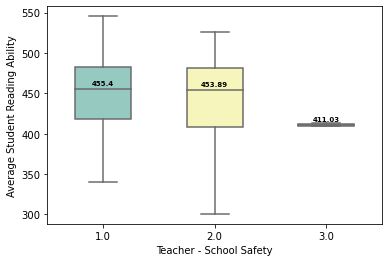

In [159]:
teach_safety = ols('OVR_SCORE ~ ATDGSOS', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATDGSOS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_safety.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATDGSOS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATDGSOS','OVR_SCORE','Teacher - School Safety','Average Student Reading Ability','NORTeacherSafety.jpeg')

Levenes statistic: 0.5682613517142544 p-value = 0.5673782111737602
Shapiro-Wilks statistic: 0.9624871611595154 p-value = 2.050871444225777e-05
KruskalResult(statistic=1.995489202765384, pvalue=0.3687100923270157)
Effect size: 0.009324715900772823


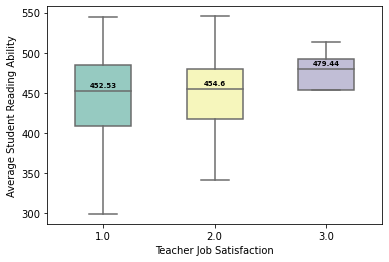

In [160]:
teach_satisf = ols('OVR_SCORE ~ ATDGTJS', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATDGTJS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_satisf.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATDGTJS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATDGTJS','OVR_SCORE','Teacher Job Satisfaction','Average Student Reading Ability','NORTeacherSatisf.jpeg')

### Norway School Variables

Days school open correlation to overall score: 0.161


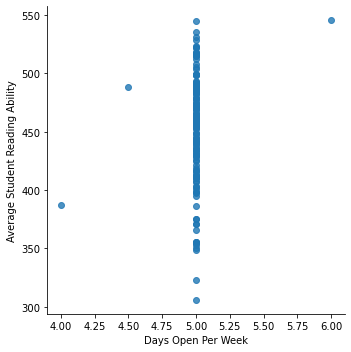

In [161]:
school_open_days = nor_school_good['ACDGDAYS'].corr(nor_school_good['OVR_SCORE'])
print('Days school open correlation to overall score: %.3f' % school_open_days)
sctplt(nor_school_good, 'ACDGDAYS', 'OVR_SCORE', 'Days Open Per Week', 'Average Student Reading Ability', 'NORSchoolOpenDays.jpeg')

Instructional hour per year correlation to overall score: 0.039


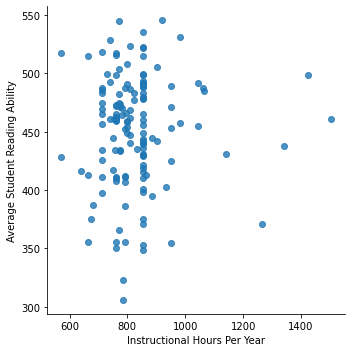

In [162]:
school_instr_hours = nor_school_good['ACDGTIHY'].corr(nor_school_good['OVR_SCORE'])
print('Instructional hour per year correlation to overall score: %.3f' % school_instr_hours)
sctplt(nor_school_good, 'ACDGTIHY', 'OVR_SCORE', 'Instructional Hours Per Year', 'Average Student Reading Ability', 'NORSchoolInstrHours.jpeg')


Levenes statistic: 1.0543426918159498 p-value = 0.3510953201590926
Shapiro-Wilks statistic: 0.9745038747787476 p-value = 0.007686914876103401
KruskalResult(statistic=1.4834792456373407, pvalue=0.47628463878998695)
Effect size: 0.009956236547901615


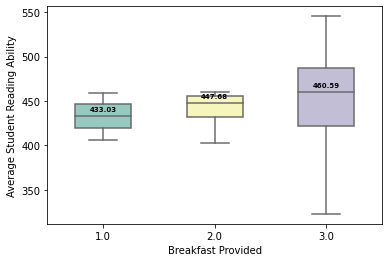

In [163]:
school_meals_b = ols('OVR_SCORE ~ ACBG06A', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACBG06A'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_b.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACBG06A")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACBG06A','OVR_SCORE','Breakfast Provided','Average Student Reading Ability','NORSchoolBreakfast.jpeg')

Levenes statistic: 1.4358312866606608 p-value = 0.24130295133137863
Shapiro-Wilks statistic: 0.9770694971084595 p-value = 0.014508247375488281
KruskalResult(statistic=1.1414475700190678, pvalue=0.5651162679581831)
Effect size: 0.007660721946436697


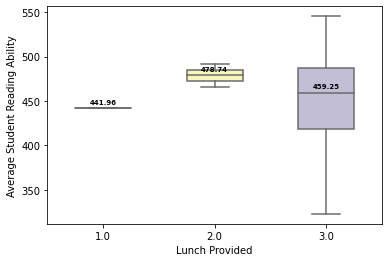

In [164]:
school_meals_l = ols('OVR_SCORE ~ ACBG06B', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACBG06B'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_l.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACBG06B")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACBG06B','OVR_SCORE','Lunch Provided','Average Student Reading Ability','NORSchoolLunch.jpeg')

Levenes statistic: 0.9848524898581748 p-value = 0.4018809761344271
Shapiro-Wilks statistic: 0.9765342473983765 p-value = 0.014146680012345314
KruskalResult(statistic=1.53068495581158, pvalue=0.6752065804857035)
Effect size: 0.010273053394708591


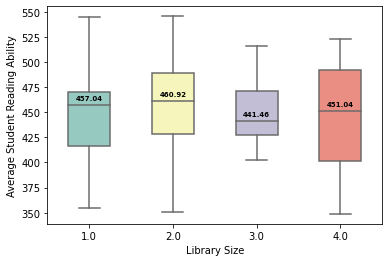

In [165]:
school_library_size = ols('OVR_SCORE ~ ACDG09', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDG09'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_library_size.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDG09")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDG09','OVR_SCORE','Library Size','Average Student Reading Ability','NORSchoolLibrary.jpeg')

Levenes statistic: 0.637310183253481 p-value = 0.5921703765537153
Shapiro-Wilks statistic: 0.9792441725730896 p-value = 0.025138000026345253
KruskalResult(statistic=7.984453290748661, pvalue=0.04633410438455237)
Effect size: 0.053586934837239336


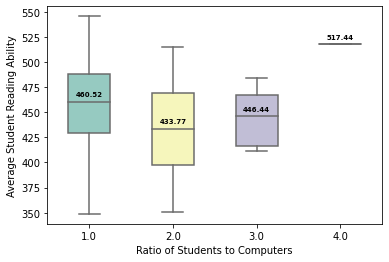

In [166]:
school_computer_resources = ols('OVR_SCORE ~ ACDG11R', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDG11R'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_computer_resources.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDG11R")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDG11R','OVR_SCORE','Ratio of Students to Computers','Average Student Reading Ability','NORSchoolComputers.jpeg')


Levenes statistic: 0.7387430316247825 p-value = 0.47951558270267636
Shapiro-Wilks statistic: 0.9766852855682373 p-value = 0.013178986497223377
KruskalResult(statistic=0.5504253242167465, pvalue=0.7594106081904546)
Effect size: 0.0036941296927298422


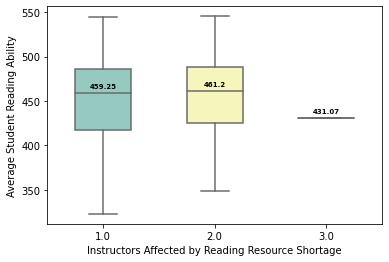

In [167]:
school_r_shortage = ols('OVR_SCORE ~ ACDGRRS', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDGRRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_r_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDGRRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDGRRS','OVR_SCORE','Instructors Affected by Reading Resource Shortage','Average Student Reading Ability','NORReShortage.jpeg')

Levenes statistic: 1.2755367205374808 p-value = 0.2824172065855589
Shapiro-Wilks statistic: 0.9765017032623291 p-value = 0.012589137069880962
KruskalResult(statistic=0.11316465602186554, pvalue=0.9449886822539749)
Effect size: 0.0007594943357172183


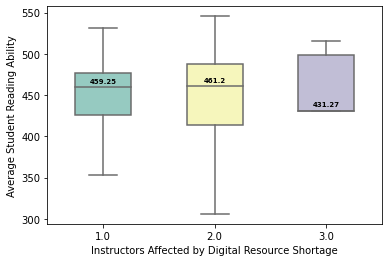

In [168]:
school_comp_shortage = ols('OVR_SCORE ~ ACDGDRS', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDGDRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_comp_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDGDRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDGDRS','OVR_SCORE','Instructors Affected by Digital Resource Shortage','Average Student Reading Ability','NORDigShortage.jpeg')

Levenes statistic: 0.1998997430896994 p-value = 0.8190396723647273
Shapiro-Wilks statistic: 0.9766089916229248 p-value = 0.012930422089993954
KruskalResult(statistic=1.0994863176603644, pvalue=0.5770980138762759)
Effect size: 0.007379102803089694


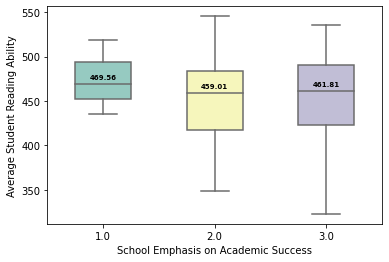

In [169]:
school_emph_suc = ols('OVR_SCORE ~ ACDGEAS', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDGEAS','OVR_SCORE','School Emphasis on Academic Success','Average Student Reading Ability','NORSchoolEmph.jpeg')

Levenes statistic: 2.061454678447973 p-value = 0.13100823855032076
Shapiro-Wilks statistic: 0.9766359329223633 p-value = 0.013017768040299416
KruskalResult(statistic=2.600950513121802, pvalue=0.2724023012846581)
Effect size: 0.01745604371222686


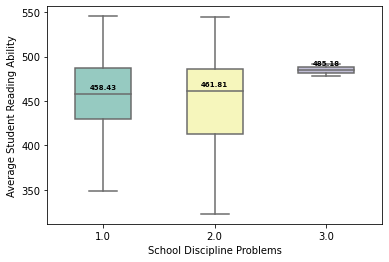

In [170]:
school_discipline = ols('OVR_SCORE ~ ACDGDAS', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDGDAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_discipline.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDGDAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDGDAS','OVR_SCORE','School Discipline Problems','Average Student Reading Ability','NORSchoolDisc.jpeg')

Principal experience correlation to overall score: 0.039


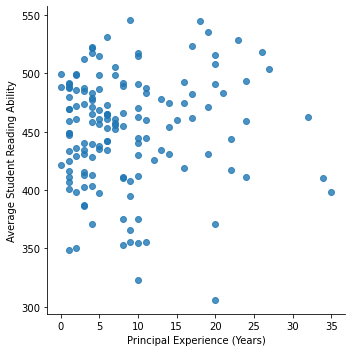

In [172]:
school_experience = nor_school_good['ACBG18'].corr(nor_school_good['OVR_SCORE'])
print('Principal experience correlation to overall score: %.3f' % school_instr_hours)
sctplt(nor_school_good, 'ACBG18', 'OVR_SCORE', 'Principal Experience (Years)', 'Average Student Reading Ability', 'NORSchoolExp.jpeg')

Levenes statistic: 0.6078007509470432 p-value = 0.610985667638295
Shapiro-Wilks statistic: 0.9728168845176697 p-value = 0.0051063173450529575
KruskalResult(statistic=3.2822072370541946, pvalue=0.3501267534312338)
Effect size: 0.02202823649029661


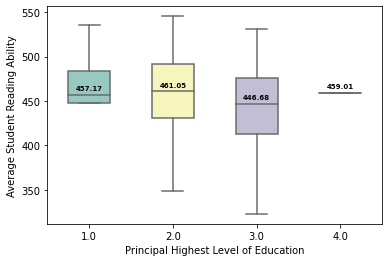

In [173]:
school_princip_edu = ols('OVR_SCORE ~ ACBG20', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACBG20'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_princip_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACBG20")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACBG20','OVR_SCORE','Principal Highest Level of Education','Average Student Reading Ability','NORSchoolEdu.jpeg')

## Ireland

### Ireland Teacher Variables

Teaching experience correlation to overall score: -0.061


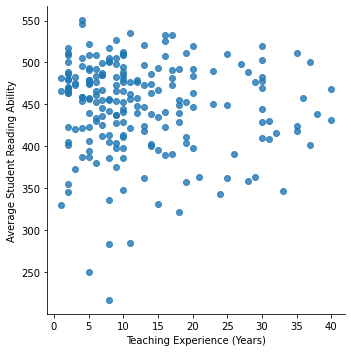

In [179]:
teach_exp_corr = irl_teach_good['ATBG01'].corr(irl_teach_good['OVR_SCORE'])
print('Teaching experience correlation to overall score: %.3f' % teach_exp_corr)
sctplt(irl_teach_good, 'ATBG01', 'OVR_SCORE', 'Teaching Experience (Years)', 'Average Student Reading Ability', 'IRLTeachExp.jpeg')

Class size correlation to overall score: 0.010


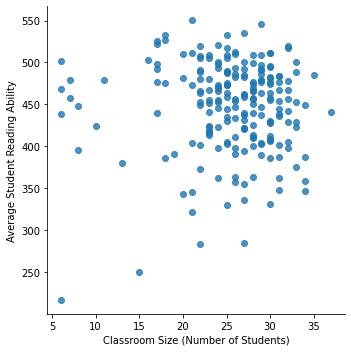

In [180]:
class_size_corr = irl_teach_good['ATBR01A'].corr(irl_teach_good['OVR_SCORE'])
print('Class size correlation to overall score: %.3f' % class_size_corr)
sctplt(irl_teach_good, 'ATBR01A', 'OVR_SCORE', 'Classroom Size (Number of Students)', 'Average Student Reading Ability', 'IRLClassSize.jpeg')

Levenes statistic: 0.10262304375985631 p-value = 0.7490290067537293
Shapiro-Wilks statistic: 0.945100724697113 p-value = 4.1767063407860405e-07
KruskalResult(statistic=1.0009922971189553, pvalue=0.31707052007969716)
Effect size: 0.004812462966918054


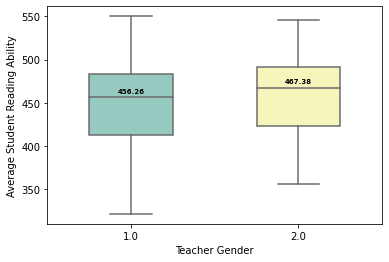

In [181]:
gender = ols('OVR_SCORE ~ ATBG02', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATBG02'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(gender.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATBG02")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

bxplt(irl_teach_good,'ATBG02','OVR_SCORE','Teacher Gender','Average Student Reading Ability','IRLTeacherGender.jpeg')

Levenes statistic: 0.6734654571956336 p-value = 0.6440161242336304
Shapiro-Wilks statistic: 0.9441156387329102 p-value = 3.199469347237027e-07
KruskalResult(statistic=4.967003358302577, pvalue=0.4199204200347011)
Effect size: 0.02387982383799316


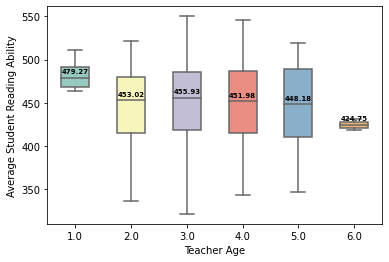

In [182]:
teach_age = ols('OVR_SCORE ~ ATBG03', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATBG03'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_age.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATBG03")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATBG03','OVR_SCORE','Teacher Age','Average Student Reading Ability','IRLTeacherAge.jpeg')

Levenes statistic: 0.37598227607213847 p-value = 0.540437731023935
Shapiro-Wilks statistic: 0.9433502554893494 p-value = 2.8771827942364325e-07
KruskalResult(statistic=0.2084557591056182, pvalue=0.6479804658274546)
Effect size: 0.0010021911495462414


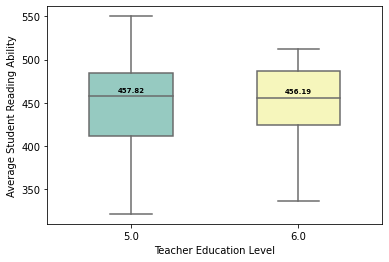

In [183]:
teach_edu = ols('OVR_SCORE ~ ATBG04', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATBG04'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATBG04")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATBG04','OVR_SCORE','Teacher Education Level','Average Student Reading Ability','IRLTeacherEducation.jpeg')

Levenes statistic: 0.8007394454174654 p-value = 0.5259962675567385
Shapiro-Wilks statistic: 0.9473249316215515 p-value = 7.97858035639365e-07
KruskalResult(statistic=0.9249632631932627, pvalue=0.9209524330364747)
Effect size: 0.004446938765352224


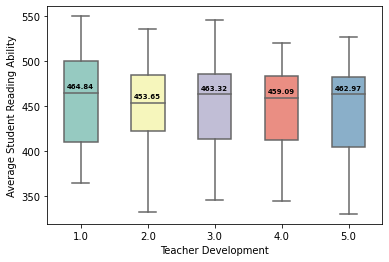

In [184]:
teach_dev = ols('OVR_SCORE ~ ATBG06', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATBG06'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_dev.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATBG06")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATBG06','OVR_SCORE','Teacher Development','Average Student Reading Ability','IRLTeacherDevelopment.jpeg')


Levenes statistic: 2.9463268031467047 p-value = 0.05477202251853415
Shapiro-Wilks statistic: 0.9401158690452576 p-value = 1.5574556755382218e-07
KruskalResult(statistic=12.1402044924223, pvalue=0.002310936913978458)
Effect size: 0.05836636775203029


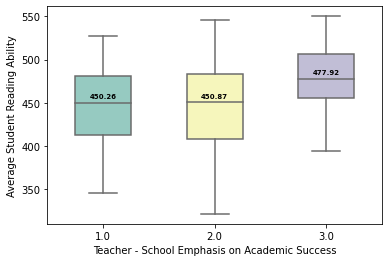

In [185]:
teach_emph_suc = ols('OVR_SCORE ~ ATDGEAS', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATDGEAS','OVR_SCORE','Teacher - School Emphasis on Academic Success','Average Student Reading Ability','IRLTeacherEmphSucc.jpeg')

Levenes statistic: 3.4568013329302523 p-value = 0.03337126046064057
Shapiro-Wilks statistic: 0.9417321681976318 p-value = 1.9366756021099718e-07
KruskalResult(statistic=2.17432405848308, pvalue=0.33717202152306125)
Effect size: 0.010453481050399423


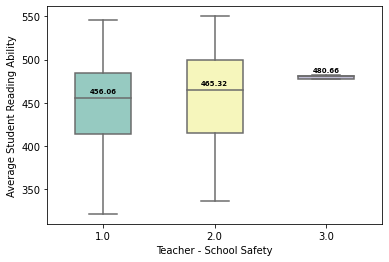

In [186]:
teach_safety = ols('OVR_SCORE ~ ATDGSOS', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATDGSOS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_safety.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATDGSOS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATDGSOS','OVR_SCORE','Teacher - School Safety','Average Student Reading Ability','IRLTeacherSafety.jpeg')

Levenes statistic: 0.6055647568170389 p-value = 0.5467347213662251
Shapiro-Wilks statistic: 0.9449901580810547 p-value = 3.858325499095372e-07
KruskalResult(statistic=1.0126748689906435, pvalue=0.6026989657663717)
Effect size: 0.004868629177839632


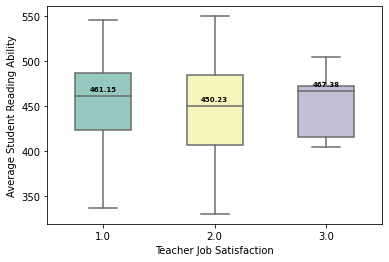

In [187]:
teach_satisf = ols('OVR_SCORE ~ ATDGTJS', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATDGTJS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_satisf.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATDGTJS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATDGTJS','OVR_SCORE','Teacher Job Satisfaction','Average Student Reading Ability','IRLTeacherSatisf.jpeg')

### Ireland School Variables

Days school open correlation to overall score: nan


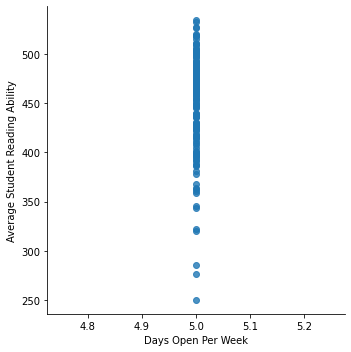

In [188]:
school_open_days = irl_school_good['ACDGDAYS'].corr(irl_school_good['OVR_SCORE'])
print('Days school open correlation to overall score: %.3f' % school_open_days)
sctplt(irl_school_good, 'ACDGDAYS', 'OVR_SCORE', 'Days Open Per Week', 'Average Student Reading Ability', 'IRLSchoolOpenDays.jpeg')

Instructional hour per year correlation to overall score: -0.090


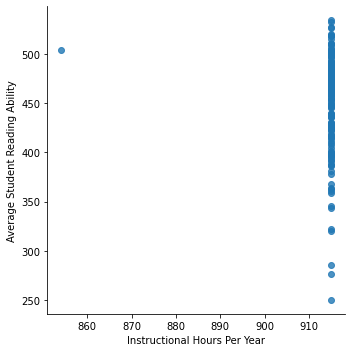

In [189]:
school_instr_hours = irl_school_good['ACDGTIHY'].corr(irl_school_good['OVR_SCORE'])
print('Instructional hour per year correlation to overall score: %.3f' % school_instr_hours)
sctplt(irl_school_good, 'ACDGTIHY', 'OVR_SCORE', 'Instructional Hours Per Year', 'Average Student Reading Ability', 'IRLSchoolInstrHours.jpeg')

Levenes statistic: 0.3127026836322261 p-value = 0.7320077079255036
Shapiro-Wilks statistic: 0.9282915592193604 p-value = 2.3244458589033457e-06
KruskalResult(statistic=5.725994397759052, pvalue=0.05709737137296784)
Effect size: 0.040899959983993234


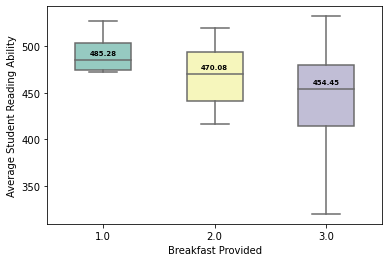

In [190]:
school_meals_b = ols('OVR_SCORE ~ ACBG06A', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACBG06A'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_b.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACBG06A")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACBG06A','OVR_SCORE','Breakfast Provided','Average Student Reading Ability','IRLSchoolBreakfast.jpeg')

Levenes statistic: 0.05787819702824954 p-value = 0.9437888309071774
Shapiro-Wilks statistic: 0.9177005887031555 p-value = 5.026143981012865e-07
KruskalResult(statistic=16.083149868134342, pvalue=0.00032180173429390593)
Effect size: 0.1148796419152453


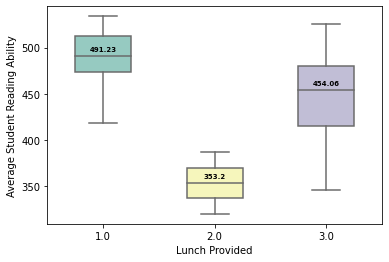

In [191]:
school_meals_l = ols('OVR_SCORE ~ ACBG06B', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACBG06B'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_l.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACBG06B")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACBG06B','OVR_SCORE','Lunch Provided','Average Student Reading Ability','IRLSchoolLunch.jpeg')


Levenes statistic: 0.7348809786902898 p-value = 0.5329825498980711
Shapiro-Wilks statistic: 0.9392263293266296 p-value = 1.1247510883549694e-05
KruskalResult(statistic=2.6661910398837563, pvalue=0.44600338174296705)
Effect size: 0.019044221713455402


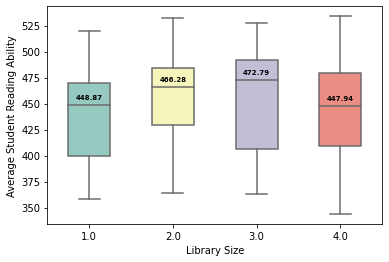

In [192]:
school_library_size = ols('OVR_SCORE ~ ACDG09', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDG09'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_library_size.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDG09")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDG09','OVR_SCORE','Library Size','Average Student Reading Ability','IRLSchoolLibrary.jpeg')

Levenes statistic: 0.5010713397754083 p-value = 0.6070465019546263
Shapiro-Wilks statistic: 0.9319561123847961 p-value = 4.719770004157908e-06
KruskalResult(statistic=3.40422812575963, pvalue=0.18229772753851137)
Effect size: 0.024315915183997356


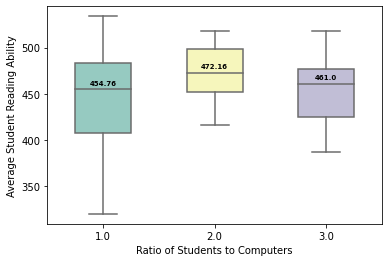

In [193]:
school_computer_resources = ols('OVR_SCORE ~ ACDG11R', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDG11R'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_computer_resources.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDG11R")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDG11R','OVR_SCORE','Ratio of Students to Computers','Average Student Reading Ability','IRLSchoolComputers.jpeg')

Levenes statistic: 0.26917217958700723 p-value = 0.6047246562627809
Shapiro-Wilks statistic: 0.9376659989356995 p-value = 7.5590833148453385e-06
KruskalResult(statistic=1.2514020462296003, pvalue=0.2632848629247043)
Effect size: 0.008938586044497146


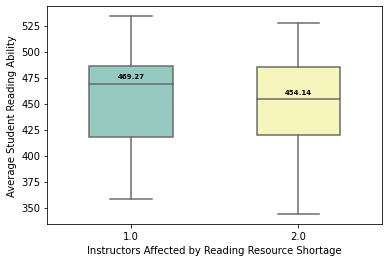

In [194]:
school_r_shortage = ols('OVR_SCORE ~ ACDGRRS', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDGRRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_r_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDGRRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDGRRS','OVR_SCORE','Instructors Affected by Reading Resource Shortage','Average Student Reading Ability','IRLReShortage.jpeg')

Levenes statistic: 0.28033799963334 p-value = 0.7559638512495095
Shapiro-Wilks statistic: 0.9367624521255493 p-value = 6.519363068946404e-06
KruskalResult(statistic=0.2776492296927131, pvalue=0.8703806669195964)
Effect size: 0.0019832087835193793


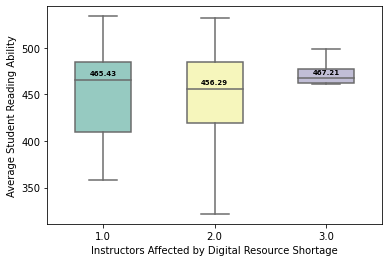

In [195]:
school_comp_shortage = ols('OVR_SCORE ~ ACDGDRS', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDGDRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_comp_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDGDRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDGDRS','OVR_SCORE','Instructors Affected by Digital Resource Shortage','Average Student Reading Ability','IRLDigShortage.jpeg')

Levenes statistic: 0.6596770983831767 p-value = 0.5186767419807625
Shapiro-Wilks statistic: 0.9279848337173462 p-value = 1.7651732377998997e-06
KruskalResult(statistic=2.628247523108655, pvalue=0.26870967385950717)
Effect size: 0.01877319659363325


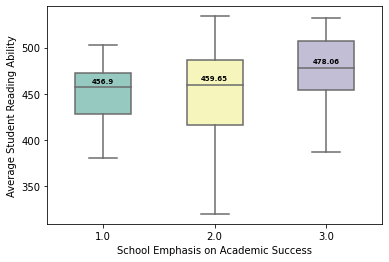

In [196]:
school_emph_suc = ols('OVR_SCORE ~ ACDGEAS', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDGEAS','OVR_SCORE','School Emphasis on Academic Success','Average Student Reading Ability','IRLSchoolEmph.jpeg')

Levenes statistic: 3.133193396357672 p-value = 0.046763591665447996
Shapiro-Wilks statistic: 0.9314069747924805 p-value = 2.98594113701256e-06
KruskalResult(statistic=2.303851036817605, pvalue=0.3160276660587319)
Effect size: 0.016456078834411463


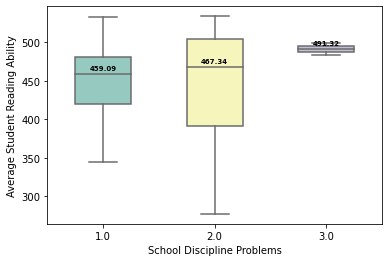

In [197]:
school_discipline = ols('OVR_SCORE ~ ACDGDAS', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDGDAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_discipline.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDGDAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDGDAS','OVR_SCORE','School Discipline Problems','Average Student Reading Ability','IRLSchoolDisc.jpeg')

Principal experience correlation to overall score: -0.090


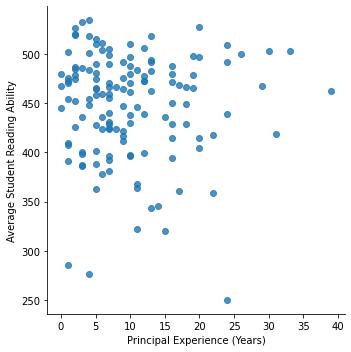

In [198]:
school_experience = irl_school_good['ACBG18'].corr(irl_school_good['OVR_SCORE'])
print('Principal experience correlation to overall score: %.3f' % school_instr_hours)
sctplt(irl_school_good, 'ACBG18', 'OVR_SCORE', 'Principal Experience (Years)', 'Average Student Reading Ability', 'IRLSchoolExp.jpeg')

Levenes statistic: 0.9604843761402728 p-value = 0.4134528936136863
Shapiro-Wilks statistic: 0.9433388710021973 p-value = 1.9654415154946037e-05
KruskalResult(statistic=3.2104683112279986, pvalue=0.3602994297462233)
Effect size: 0.022931916508771417


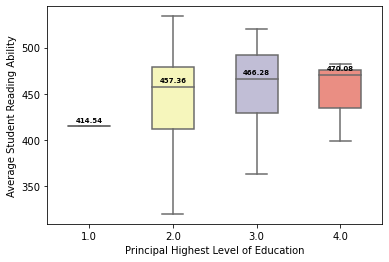

In [199]:
school_princip_edu = ols('OVR_SCORE ~ ACBG20', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACBG20'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_princip_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACBG20")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACBG20','OVR_SCORE','Principal Highest Level of Education','Average Student Reading Ability','IRLSchoolEdu.jpeg')

# Between Country Comparison

Levenes statistic: 4.720883792245868 p-value = 0.002864645741912424
Shapiro-Wilks statistic: 0.9541956782341003 p-value = 6.622007358691312e-14
KruskalResult(statistic=2.679830342643292, pvalue=0.44366580552080537)
Effect size: 0.019141645304594942


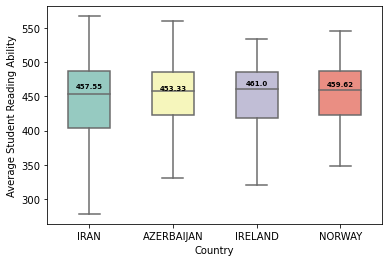

In [209]:
school_scores = ols('OVR_SCORE ~ IDCNTRY', data=all_teach_good).fit()

values_per_group = [col for col_name, col in all_school_good.groupby(['IDCNTRY'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_scores.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in all_school_good.groupby("IDCNTRY")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(all_school_good,'IDCNTRY','OVR_SCORE','Country','Average Student Reading Ability','SchoolScores.jpeg')

Levenes statistic: 2.747498302428629 p-value = 0.041837901076939465
Shapiro-Wilks statistic: 0.9532948136329651 p-value = 6.607980630727635e-17
KruskalResult(statistic=0.867188079504731, pvalue=0.83333797698298)
Effect size: 0.0041691734591573605


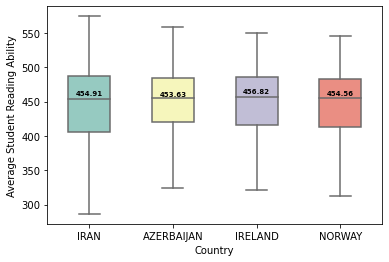

In [211]:
teach_scores = ols('OVR_SCORE ~ IDCNTRY', data=all_teach_good).fit()

values_per_group = [col for col_name, col in all_teach_good.groupby(['IDCNTRY'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_scores.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in all_teach_good.groupby("IDCNTRY")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(all_teach_good,'IDCNTRY','OVR_SCORE','Country','Average Student Reading Ability','TeacherScores.jpeg')

In [223]:
import researchpy as rp

In [231]:
table, results = rp.crosstab(all_teach_good['ATDGEAS'], all_teach_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("School emphasis on academic success - teacher index")
print(table)
print()
print(results)

School emphasis on academic success - teacher index
        UN_INDEX                
               0       1     All
ATDGEAS                         
1.0         9.21    8.55    8.92
2.0        61.28   62.47   61.80
3.0        29.51   28.98   29.28
All       100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    0.1914
1                    p-value =    0.9087
2                 Cramer's V =    0.0142


In [247]:
table, results = rp.crosstab(all_school_good['ACDGEAS'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("School emphasis on academic success - school index")
print(table)
print()
print(results)

School emphasis on academic success - school index
        UN_INDEX                
               0       1     All
ACDGEAS                         
1.0         9.20   12.63   10.63
2.0        52.74   62.46   56.77
3.0        38.06   24.91   32.61
All       100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   13.4603
1                    p-value =    0.0012
2                 Cramer's V =    0.1400


In [239]:
table, results = rp.crosstab(all_school_good['ACDG09'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Library Size")
print(table)
print()
print(results)

Library Size
       UN_INDEX                
              0       1     All
ACDG09                         
1.0       12.59   16.73   14.31
2.0       40.30   55.87   46.76
3.0       33.50    7.12   22.57
4.0       13.60   20.28   16.37
All      100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   65.7374
1                    p-value =    0.0000
2                 Cramer's V =    0.3114


In [240]:
table, results = rp.crosstab(all_school_good['ACDG11R'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Computer Resources")
print(table)
print()
print(results)

Computer Resources
        UN_INDEX                
               0       1     All
ACDG11R                         
1.0         9.45   72.50   36.16
2.0        13.39   16.07   14.52
3.0        41.99   11.07   28.90
4.0        35.17    0.36   20.42
All       100.00  100.00  100.00

                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   327.4327
1                    p-value =     0.0000
2                 Cramer's V =     0.7038


In [241]:
table, results = rp.crosstab(all_school_good['ACDGRRS'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Reading Resource Shortage")
print(table)
print()
print(results)

Reading Resource Shortage
        UN_INDEX                
               0       1     All
ACDGRRS                         
1.0         7.21   40.56   21.08
2.0        80.10   59.09   71.37
3.0        12.69    0.35    7.56
All       100.00  100.00  100.00

                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   132.1517
1                    p-value =     0.0000
2                 Cramer's V =     0.4383


In [242]:
table, results = rp.crosstab(all_school_good['ACDGDRS'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Digital Resource Shortage")
print(table)
print()
print(results)

Digital Resource Shortage
        UN_INDEX                
               0       1     All
ACDGDRS                         
1.0         9.23   31.82   18.63
2.0        71.57   64.34   68.56
3.0        19.20    3.85   12.81
All       100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   77.7335
1                    p-value =    0.0000
2                 Cramer's V =    0.3364


In [245]:
table, results = rp.crosstab(all_school_good['ACDGDAS'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Discipline")
print(table)
print()
print(results)

Discipline
        UN_INDEX                
               0       1     All
ACDGDAS                         
1.0        69.08   79.30   73.32
2.0        21.95   18.95   20.70
3.0         8.98    1.75    5.98
All       100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   17.6401
1                    p-value =    0.0001
2                 Cramer's V =    0.1604


In [246]:
table, results = rp.crosstab(all_teach_good['ATDGSOS'], all_teach_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Safety")
print(table)
print()
print(results)

Safety
        UN_INDEX                
               0       1     All
ATDGSOS                         
1.0        74.86   78.72   76.57
2.0        22.89   19.62   21.44
3.0         2.25    1.65    1.99
All       100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    2.0564
1                    p-value =    0.3576
2                 Cramer's V =    0.0464


# Important Notes

IRAN:
- Teaching exp (minor correlation) - 0.277
- Class size (minor correlation) - 0.270
- Gender (moderate effect size - 0.13) 
- Teacher age (moderate effect size - 0.09)
- Library size (moderate effect size - 0.2387)
- Computer resources (small effect size - 0.05)
- Reading resource shortage (small effect size - 0.06)
- Digital resource shortage (small effect size - 0.04)
- School emphasis on success (small effect size - 0.07)
- School discipline (small effecti size - 0.08)

AZE:
- emphasis on success - teacher (small effect size - 0.04)
- safety - teacher (small effect size - 0.057)
- compute resources (moderat effect size - 0.12)
- principal education level (small effect size - 0.06) 

NOR:
- computer resources (small effect size - 0.05) 

IRL:
- emphasis on success - teacher (small effect size - 0.06)
- lunch provided (moderate effect size - 0.11)


Different in (between high index and low index):
- school emphasis on acadmeic success
- library size
- computer resources
- reading resource shortage
- computer resource shortage
- school discipline 